In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def loss(w1, w2):
    return 0.5 * w1 * w1 * w2 * w2 + 1e-300 # add epsilon to ensure log10 works on positive number

# train model from scratch
def train_model(init_w1, init_w2, lr1, lr2, num_iter):
    w1 = init_w1
    w2 = init_w2
    for i in range(num_iter):
        old_w1 = w1
        w1 -= lr1 * w1 * w2 * w2
        w2 -= lr2 * old_w1 * old_w1 * w2
        if abs(w1) > 100 * abs(init_w1) or abs(w2) > 100 * abs(init_w2):
            break

    return np.log10(loss(w1, w2))


def plot(init_w1, init_w2, k=100, lr1_start=0.001, lr1_end=1,
         lr2_start=0.001, lr2_end=1, steps=500):
    lr1_list = np.linspace(lr1_start, lr1_end, steps)
    lr2_list = np.linspace(lr2_start, lr2_end, steps)
    density_list = np.zeros((steps, steps))

    for i, a1 in enumerate(lr1_list):
        for j, a2 in enumerate(lr2_list):
            density = train_model(init_w1, init_w2, a1, a2, k)
            density_list[j][i] = density

    plt.imshow(density_list,
               extent=[lr1_start, lr1_end, lr2_start, lr2_end],
               interpolation=None,
               origin='lower')
    plt.title(f'Last iteration log10(L) with maximum of {k} iterations (corner)')
    plt.colorbar()
    plt.xlabel(r'$\alpha1$')
    plt.ylabel(r'$\alpha2$')
    plt.show()

4c.1)
We choose $w_1(0)=2.1, ~w_2(0)=2.0$. The range of both learning rate is $\{0.001, 0.002, \dots, 1\}$. As $k$ increases, the area of the dark color increases, indicating a larger region that yield convergence. Additionally the contrast of color also increases and clearer boundaries can be seen on graphs trained with more iterations.

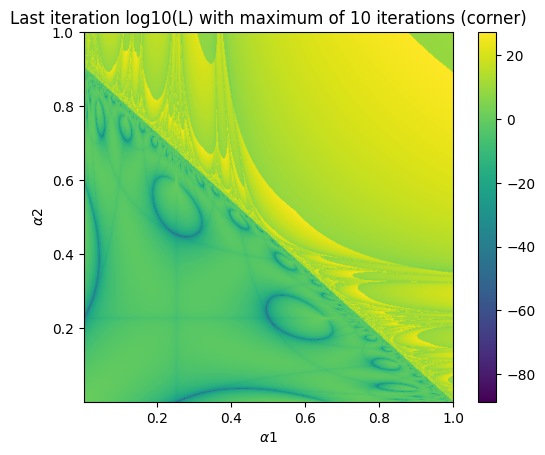

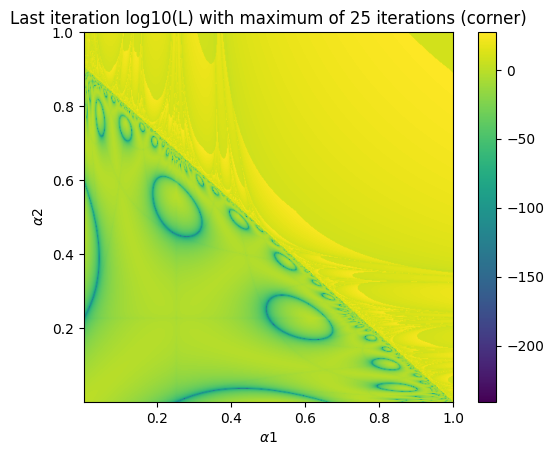

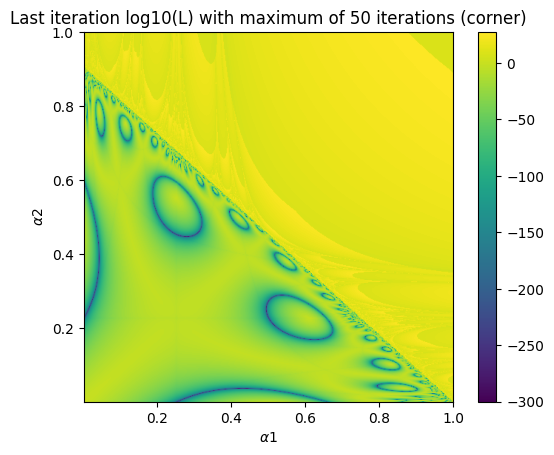

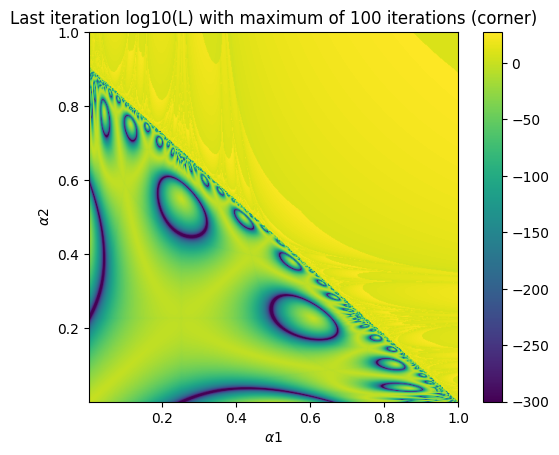

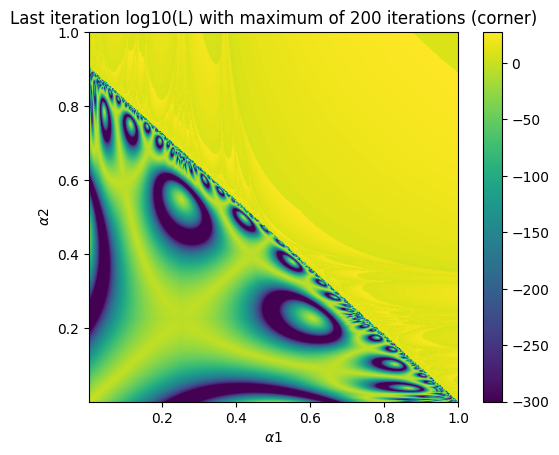

In [ ]:
for k in [10, 25, 50, 100, 200]:
    plot(2.1, 2.0, k)

4c.2) We investigate 3 choices and notice the following:

*   Increasing $w_1(0)$ will decrease the $y$-intercept of the graph. In the second graph below, the $y$-intercept is larger than before because $w_1$ is now larger.
*   Increasing $w_2(0)$ will decrease the $x$-intercept of the graph. Similar as what we discussed above. It is also worth noting that the first and second plot are same after flipping through $y=x$.
*   There is a clear linear boundary which is the line connecting these intercepts

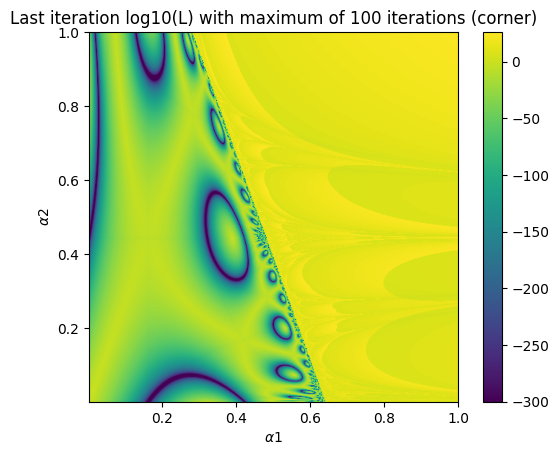

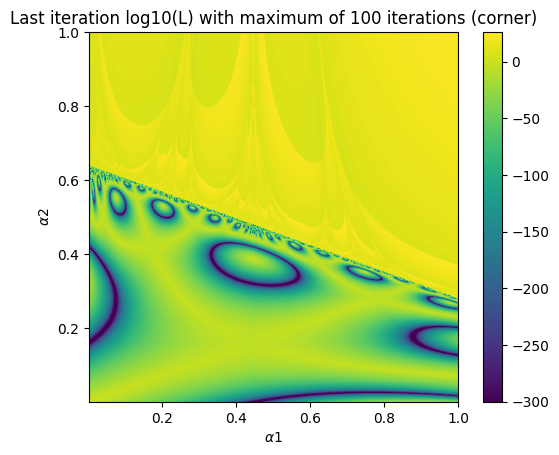

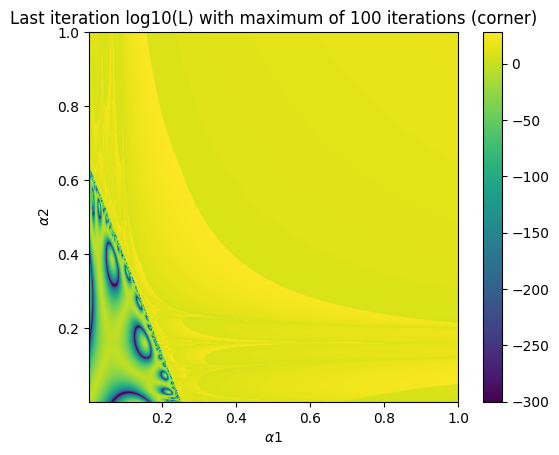

In [ ]:
plot(1.5, 2.5)
plot(2.5, 1.5)
plot(2.5, 4)

4c.3) There is a very clear linear boundary in the graphs. for all $(\alpha_1,~ \alpha_2)$ above the boundaries, we get divergences.

While for the region under the boundary, we can see some dark rings which leads to convergence and other regions leads to divergence.

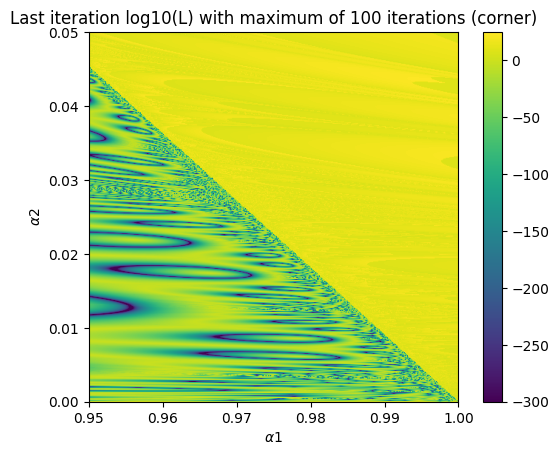

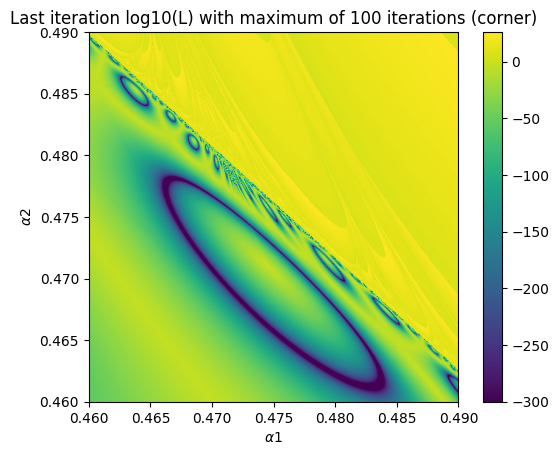

In [ ]:
# zoom in bottom-right corner
plot(2.1, 2.0, lr1_start=0.95, lr1_end=1, lr2_start=0, lr2_end=0.05)

# zoom in middle
plot(2.1, 2.0, lr1_start=0.46, lr1_end=0.49, lr2_start=0.46, lr2_end=0.49)

4c.4) We generate 2 plots above, the first is the zoomed-in view of the bottom-left corner and the other is that if middle of the graph. We made several observations.


*   The rings becomes thinner near the boundary, this is because it becomes harder to train the parameters.
*   The rings becomes more elliptical near the boundary, in the first figure, those rings is extremely elliptical in one direction.
*   The are a lot of (probably infinite) small rings near the boundary.



4c.5) We want to find the $x$ and $y$-intercept of the boundary and the slope of it.

From our observation in 4c.2), we realized that there is a relation between the intercepts and value of $w$. To find out the relation, We investigated several values of $w_1$. Specifically, when $w_1(0)=2$ and $w_2(0)=4$, the $y$-intercept is $y=1$ and $x$-intercept is $x=0.25$.

We tried to fit a equation for this relation and it turns out the intercept is $\frac{4}{w^2}$. we verified this is correct with some other weight (for $w_1(0)=3$ and $w_2(0)=5$, the $y$-intercept is roughly $\frac{4}{3^2} = 0.44$ and the $x$-intercept is roughly $\frac{4}{5^2} = 0.16$).

Now that we have the $x$-intercept to be $y=\frac{4}{w_2(0)}$ and $y$-intercept to be $x=\frac{4}{w_1(0)}$, we can represent the linear boundary as $\alpha_2 = \frac{4-w_2(0)^2\cdot \alpha_1}{w_1(0)^2}$.


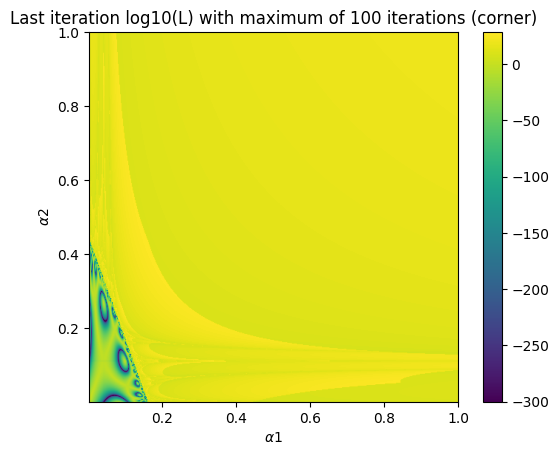

In [ ]:
plot(3, 5)